The plotting utilities and various visualization tools for this notebook depend on [degas](https://github.com/williamgilpin/degas) and [tsfresh](https://tsfresh.readthedocs.io/en/latest/)

In [1]:
import sys

import matplotlib.pyplot as plt
import json

import pandas as pd
import dysts
from dysts.datasets import *
from dysts.utils import *



try:
    from degas import *
except:
    pass

import degas as dg
FIGURE_PATH = "./private_writing/fig_resources/"

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
# chunk and featurize several time windows


all_feature_dfs = list()
for i in np.linspace(0, 8000, 40).astype(int):
    dataset = TimeSeriesDataset("dysts/data/large_univariate__pts_per_period_100__periods_100.json")
    dataset.trim_series(i, i + 2000)
    feature_df = featurize_timeseries(dataset)
    all_feature_dfs.append(feature_df)
    print(i)
    
## Prune features not detected across all replicates
all_feature_lists = [set(item.columns.to_list()) for item in all_feature_dfs]
common_features = np.array(list(all_feature_lists[0].intersection(*all_feature_lists[1:])))
print(f"{len(common_features)} common features found.")
for i in range(len(all_feature_dfs)):
    all_feature_dfs[i] = all_feature_dfs[i][common_features]

rep_stds = np.std(np.dstack([np.array(df) for df in all_feature_dfs]), axis=-1)
topk_feature_inds = np.squeeze(np.array([np.argsort(np.median(rep_stds, axis=0))]))[:100]
feat_arr_all = np.dstack([np.array(df)[:, topk_feature_inds] for df in all_feature_dfs])
feat_arr_all = np.transpose(feat_arr_all, (2, 0, 1))
# feat_arr_all.dump("benchmarks/resources/feat_arr_all.pkl")




Feature Extraction: 100%|██████████| 33/33 [01:14<00:00,  2.25s/it]


0


Feature Extraction: 100%|██████████| 33/33 [01:15<00:00,  2.28s/it]


205


Feature Extraction: 100%|██████████| 33/33 [01:13<00:00,  2.23s/it]


410


Feature Extraction: 100%|██████████| 33/33 [01:29<00:00,  2.72s/it]


615


Feature Extraction: 100%|██████████| 33/33 [01:17<00:00,  2.34s/it]


820


Feature Extraction: 100%|██████████| 33/33 [01:15<00:00,  2.29s/it]


1025


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.38s/it]


1230


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.38s/it]


1435


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.40s/it]


1641


Feature Extraction: 100%|██████████| 33/33 [01:15<00:00,  2.29s/it]


1846


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.37s/it]


2051


Feature Extraction: 100%|██████████| 33/33 [01:17<00:00,  2.35s/it]


2256


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.45s/it]


2461


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


2666


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.40s/it]


2871


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.43s/it]


3076


Feature Extraction: 100%|██████████| 33/33 [01:23<00:00,  2.54s/it]


3282


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.40s/it]


3487


Feature Extraction: 100%|██████████| 33/33 [01:21<00:00,  2.47s/it]


3692


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


3897


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.40s/it]


4102


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.43s/it]


4307


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


4512


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


4717


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


4923


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.43s/it]


5128


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.44s/it]


5333


Feature Extraction: 100%|██████████| 33/33 [01:22<00:00,  2.51s/it]


5538


Feature Extraction: 100%|██████████| 33/33 [01:21<00:00,  2.46s/it]


5743


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.39s/it]


5948


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.37s/it]


6153


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.37s/it]


6358


Feature Extraction: 100%|██████████| 33/33 [01:17<00:00,  2.36s/it]


6564


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.43s/it]


6769


Feature Extraction: 100%|██████████| 33/33 [01:16<00:00,  2.31s/it]


6974


Feature Extraction: 100%|██████████| 33/33 [01:21<00:00,  2.46s/it]


7179


Feature Extraction: 100%|██████████| 33/33 [01:12<00:00,  2.18s/it]


7384


Feature Extraction: 100%|██████████| 33/33 [01:13<00:00,  2.24s/it]


7589


Feature Extraction: 100%|██████████| 33/33 [01:12<00:00,  2.19s/it]


7794


Feature Extraction: 100%|██████████| 33/33 [01:15<00:00,  2.29s/it]


8000
735 common features found.


In [3]:
# Load output of cell above
feat_arr_all = np.load("benchmarks/resources/feat_arr_all.pkl", allow_pickle=True) 
features_mean = np.median(feat_arr_all, axis=0)
feat_arr_all_flat = np.reshape(feat_arr_all, (-1, feat_arr_all.shape[-1]))
feat_arr = features_mean

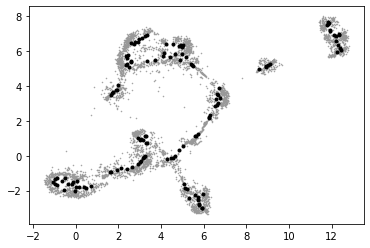

In [8]:
import umap
# model =  PCA(n_components=2, random_state=0)
# model = umap.UMAP(random_state=0, densmap=True)

# from umap.parametric_umap import ParametricUMAP
# model = ParametricUMAP(densmap=False)
model = umap.UMAP(random_state=15, n_neighbors=5)

embedding_mean = model.fit_transform(features_mean)
embedding_all = model.transform(feat_arr_all_flat)


plt.plot(embedding_all[:, 0], embedding_all[:, 1], '.', color=[0.6, 0.6, 0.6], markersize=1)
plt.plot(embedding_mean[:, 0], embedding_mean[:, 1], '.k')

In [9]:
import dysts.flows

all_attributes = list()
for item in dataset.names:
    model_dyn = getattr(dysts.flows, item)()
    all_attributes.append(model_dyn.maximum_lyapunov_estimated)
all_attributes = np.array(all_attributes)

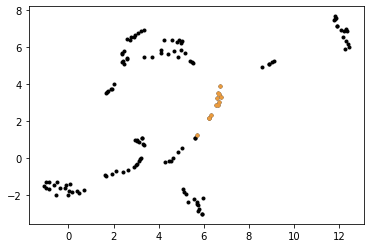

In [55]:

plt.plot(
    embedding_mean[:, 0], 
    embedding_mean[:, 1],
    ".k"
)

view_ind = 2
plt.plot(
    embedding_mean[:, 0][labels_mean == view_ind], 
    embedding_mean[:, 1][labels_mean == view_ind],
    ".",
    color = dg.pastel_rainbow[view_ind]
)

Number of classes:  7


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


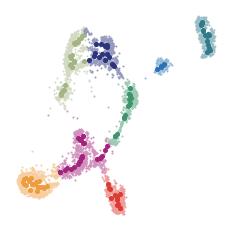

In [218]:
import hdbscan


## Cluster data
clusterer = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=6, prediction_data=True)
# clusterer = hdbscan.HDBSCAN(min_cluster_size=5, prediction_data=True)
# clusterer = hdbscan.HDBSCAN(cluster_selection_epsilon=1, prediction_data=True)
labels_mean = clusterer.fit_predict(embedding_mean)
labels_all, _ = hdbscan.approximate_predict(clusterer, embedding_all)

from sklearn.cluster import SpectralClustering, KMeans, AffinityPropagation
clusterer = SpectralClustering(3, n_init=100, assign_labels='discretize')
clusterer = KMeans(10)
clusterer = AffinityPropagation()
labels_mean = clusterer.fit_predict(embedding_mean)
labels_all = clusterer.predict(embedding_all)


# clusterer = AffinityPropagation()
# # clusterer = KMeans()
# labels_mean = clusterer.fit_predict(features_mean)
# labels_all = clusterer.predict(feat_arr_all_flat)


# clusterer = hdbscan.HDBSCAN(min_cluster_size=4, prediction_data=True)
# # clusterer = hdbscan.HDBSCAN(min_cluster_size=5, prediction_data=True)
# # clusterer = hdbscan.HDBSCAN(cluster_selection_epsilon=1, prediction_data=True)
# labels_mean = clusterer.fit_predict(features_mean)
# labels_all, _ = hdbscan.approximate_predict(clusterer, feat_arr_all_flat)



all_name_clusters = list()
print("Number of classes: ", len(np.unique(labels_mean)) - 1)
for label in np.unique(labels_mean):
    
    #if label >= 0:
    all_name_clusters.append(dataset.names[labels_mean == label])
    if label >= 0:
#         color_val = pastel_rainbow_interpolated[label]
        color_val = dg.pastel_rainbow[label]
#         color_val = dg.pastel_rainbow[label]
    else:
        color_val = (0.6, 0.6, 0.6)
    
    plt.plot(
        embedding_all[labels_all == label, 0], 
        embedding_all[labels_all == label, 1],  
        '.', 
        markersize=2, 
        color=dg.lighter(color_val, 0.5)
    )
    plt.plot(
        embedding_mean[labels_mean == label, 0], 
        embedding_mean[labels_mean == label, 1],  
        '.', 
        color=color_val,
        markersize=8
    )

fixed_aspect_ratio(1)
dg.vanish_axes()
# dg.better_savefig(FIGURE_PATH + "clustered_umap2.png")

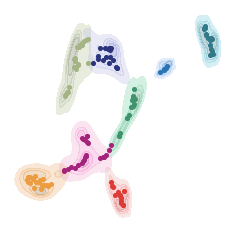

In [225]:
# ax = sns.kdeplot(x=embedding_all[:, 0], y=embedding_all[:, 1], hue=labels_all, 
#             palette=sns.color_palette(dg.pastel_rainbow[:len(np.unique(labels_all))]), 
#              marginal_kws={"lw":0.5},
#             shade=False, bw_adjust=1.3, levels=5)

ax = sns.kdeplot(x=embedding_all[:, 0], y=embedding_all[:, 1], hue=labels_all, 
            palette=sns.color_palette(dg.pastel_rainbow[:len(np.unique(labels_all))]), 
            shade=True, bw_adjust=1.3, levels=5)

for contour in ax.collections[:]:
    contour.set_alpha(0.3)
    
ax.grid(False)
ax.legend_.remove()

for label in np.unique(labels_mean):
    
    #if label >= 0:
    all_name_clusters.append(dataset.names[labels_mean == label])
    if label >= 0:
#         color_val = pastel_rainbow_interpolated[label]
        color_val = dg.pastel_rainbow[label]
#         color_val = dg.pastel_rainbow[label]
    else:
        color_val = (0.6, 0.6, 0.6)
    
#     plt.plot(
#         embedding_all[labels_all == label, 0], 
#         embedding_all[labels_all == label, 1],  
#         '.', 
#         markersize=2, 
#         color=dg.lighter(color_val, 0.5)
#     )
    plt.plot(
        embedding_mean[labels_mean == label, 0], 
        embedding_mean[labels_mean == label, 1],  
        '.', 
        color=color_val,
        markersize=8
    )
    
dg.fixed_aspect_ratio(1)
dg.vanish_axes()

# dg.better_savefig(FIGURE_PATH + "clustered_umap.png")

In [66]:
# import hdbscan


# ## Cluster data
# clusterer = hdbscan.HDBSCAN(min_cluster_size=4, prediction_data=True)
# clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True)
# labels_mean = clusterer.fit_predict(embedding_mean)
# labels_all, _ = hdbscan.approximate_predict(clusterer, embedding_all)




# ## Swap colors for better visualization
# i_s, j_s = 3, 9
# labels_mean[labels_mean == i_s], labels_mean[labels_mean == j_s] = (j_s, i_s)
# labels_all[labels_all == i_s], labels_all[labels_all == j_s] = (j_s, i_s)

# all_name_clusters = list()
# for label in np.unique(labels_mean):
    
#     #if label >= 0:
#     all_name_clusters.append(dataset.names[labels_mean == label])
#     if label >= 0:
# #         color_val = pastel_rainbow_interpolated[label]
#         color_val = dg.pastel_rainbow[label % 8]
# #         color_val = dg.pastel_rainbow[label]
#     else:
#         color_val = (0.6, 0.6, 0.6)
    
#     plt.plot(
#         embedding_all[labels_all == label, 0], 
#         embedding_all[labels_all == label, 1],  
#         '.', 
#         markersize=2, 
#         color=dg.lighter(color_val, 0.5)
#     )
#     plt.plot(
#         embedding_mean[labels_mean == label, 0], 
#         embedding_mean[labels_mean == label, 1],  
#         '.', 
#         color=color_val,
#         markersize=8
#     )

# fixed_aspect_ratio(1)
# dg.vanish_axes()
# # dg.better_savefig(FIGURE_PATH + "clustered_umap")

/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")


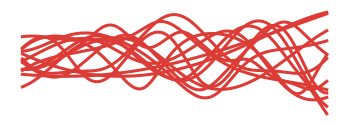

0   ['Bouali2' 'Chua' 'Coullet' 'DequanLi' 'FluidTrampoline'
 'GuckenheimerHolmes' 'Hadley' 'HyperRossler' 'KawczynskiStrizhak'
 'SprottD' 'SprottDelay' 'StickSlipOscillator' 'YuWang2'] 
--------------



/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")


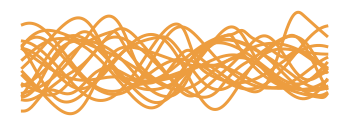

1   ['BickleyJet' 'Blasius' 'CellCycle' 'HenonHeiles' 'Hopfield' 'IkedaDelay'
 'NoseHoover' 'NuclearQuadrupole' 'Rossler' 'SprottI' 'SprottJ'
 'SprottJerk' 'SprottM' 'SprottMore' 'SprottN' 'SprottP' 'SprottS'
 'WindmiReduced'] 
--------------



/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")


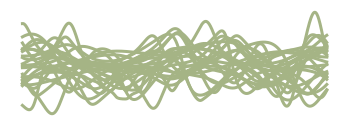

2   ['AnishchenkoAstakhov' 'ArnoldWeb' 'BlinkingVortex' 'BurkeShaw' 'Colpitts'
 'HyperLu' 'HyperPang' 'HyperXu' 'HyperYangChen' 'IsothermalChemical'
 'Laser' 'Lorenz' 'LuChenCheng' 'NewtonLiepnik' 'PanXuZhou' 'PehlivanWei'
 'QiChen' 'SprottC' 'SprottK' 'SprottQ' 'SprottR' 'Tsucs2' 'VallisElNino'] 
--------------



/Users/williamgilpin/program_repos/dysts/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")


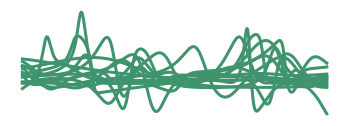

3   ['BelousovZhabotinsky' 'ChenLee' 'CoevolvingPredatorPrey' 'Dadras'
 'ExcitableCell' 'ForcedBrusselator' 'HindmarshRose' 'HyperYan'
 'ItikBanksTumor' 'Rucklidge' 'SprottB' 'SprottE' 'SprottTorus' 'WangSun'] 
--------------



/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")


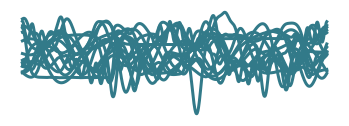

4   ['BeerRNN' 'DoublePendulum' 'HastingsPowell' 'JerkCircuit' 'Lorenz84'
 'Lorenz96' 'LuChen' 'PiecewiseCircuit' 'SprottF' 'SprottH' 'SprottL'
 'SprottO' 'Torus' 'TurchinHanski' 'VossDelay'] 
--------------



/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")


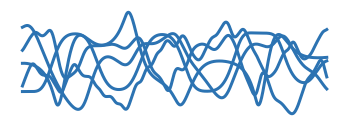

5   ['MackeyGlass' 'OscillatingFlow' 'Thomas' 'ThomasLabyrinth' 'YuWang'] 
--------------



/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least on

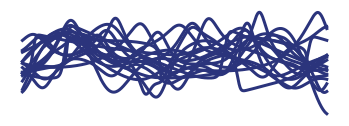

6   ['Aizawa' 'CaTwoPlus' 'CaTwoPlusQuasiperiodic' 'Chen' 'CircadianRhythm'
 'Finance' 'ForcedFitzHughNagumo' 'ForcedVanDerPol' 'Halvorsen'
 'HyperLorenz' 'LorenzCoupled' 'LorenzStenflo' 'MacArthur' 'MooreSpiegel'
 'RayleighBenard' 'Sakarya' 'SprottG'] 
--------------



/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least on

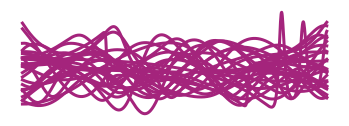

7   ['Arneodo' 'ArnoldBeltramiChildress' 'BlinkingRotlet' 'Bouali'
 'CellularNeuralNetwork' 'DoubleGyre' 'Duffing' 'GenesioTesi' 'HyperBao'
 'HyperCai' 'HyperJha' 'HyperQi' 'HyperWang' 'LiuChen' 'LorenzBounded'
 'MultiChua' 'Qi' 'RabinovichFabrikant' 'RikitakeDynamo' 'SaltonSea'
 'SanUmSrisuchinwong' 'ScrollDelay' 'ShimizuMorioka' 'SprottA'
 'SwingingAtwood' 'ZhouChen'] 
--------------



In [171]:
import dysts.flows

for label, cluster in zip(np.unique(labels_mean), all_name_clusters):
    if label < 0:
        continue
    #print(label, cluster)
    color_val = dg.pastel_rainbow[label]
    plt.figure()
    for item in cluster:
        model_dyn = getattr(dysts.flows, item)()
        sol = model_dyn.make_trajectory(1000, resample=True, standardize=True, pts_per_period=500)
        #plt.plot(sol[:, 0], sol[:, 1], color=color_val)
        plt.plot(sol[:, 0], color=color_val, linewidth=3)
    fixed_aspect_ratio(1/3)
    dg.vanish_axes()
    dg.better_savefig(FIGURE_PATH + f"ts{label}.png")
    plt.show()
    
    print(label, " ", cluster, "\n--------------\n", flush=True)

In [ ]:
## Next step: Assign feature importance

+ Fit a RandomForest to pseudolabels?


In [24]:
from scipy.stats import spearmanr

top_features = list()
for i, feats in enumerate(feat_arr.T):
    max_corr = max(
        np.abs(spearmanr(embedding_mean[:, 0] + embedding_mean[:, 1], feats).correlation),
        np.abs(spearmanr(embedding_mean[:, 0] + embedding_mean[:, 1], feats).correlation)
       )
    if max_corr > 0.5:
        top_features.append((i, feat_names[i], max_corr))
sort_inds = np.argsort([item[2] for item in top_features])[::-1].astype(int)
top_features = np.array(top_features)[sort_inds]
print(top_features[:10])

/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


NameError: name 'feat_names' is not defined

# Plot example dynamics

/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least on

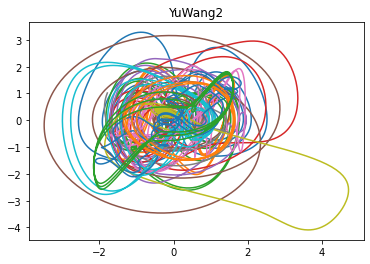

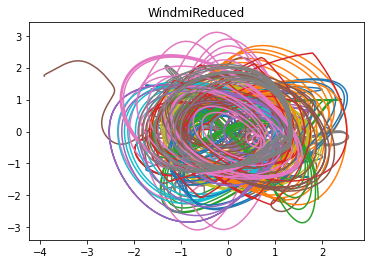

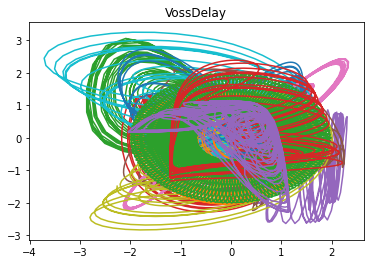

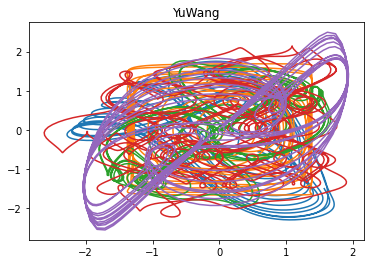

In [164]:
for cluster in [all_name_clusters[i] for i in [0, 1, 4, 5]]:
    
    colors = ["r", "b", "k"]
    plt.figure()
    for j, equation_name in enumerate(cluster):
        eq = getattr(dysts.flows, equation_name)()
        sol = standardize_ts(eq.make_trajectory(2000, resample=True, pts_per_period=200))
#         plt.figure()
#         plt.plot(sol[:, 0],  'k')

        
        plt.plot(sol[:, 0], sol[:, 1])
        plt.title(equation_name)
        

In [166]:
np.array(all_name_clusters)[[0, 1, 4, 5]]

<ipython-input-166-0af791b2b517>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(all_name_clusters)[[0, 1, 4, 5]]


array([array(['Bouali2', 'Chua', 'Coullet', 'DequanLi', 'FluidTrampoline',
              'GuckenheimerHolmes', 'Hadley', 'HyperRossler',
              'KawczynskiStrizhak', 'SprottD', 'SprottDelay',
              'StickSlipOscillator', 'YuWang2'], dtype='<U23')            ,
       array(['BickleyJet', 'Blasius', 'CellCycle', 'HenonHeiles', 'Hopfield',
              'IkedaDelay', 'NoseHoover', 'NuclearQuadrupole', 'Rossler',
              'SprottI', 'SprottJ', 'SprottJerk', 'SprottM', 'SprottMore',
              'SprottN', 'SprottP', 'SprottS', 'WindmiReduced'], dtype='<U23'),
       array(['BeerRNN', 'DoublePendulum', 'HastingsPowell', 'JerkCircuit',
              'Lorenz84', 'Lorenz96', 'LuChen', 'PiecewiseCircuit', 'SprottF',
              'SprottH', 'SprottL', 'SprottO', 'Torus', 'TurchinHanski',
              'VossDelay'], dtype='<U23')                                     ,
       array(['MackeyGlass', 'OscillatingFlow', 'Thomas', 'ThomasLabyrinth',
              'YuWang'], dtype='

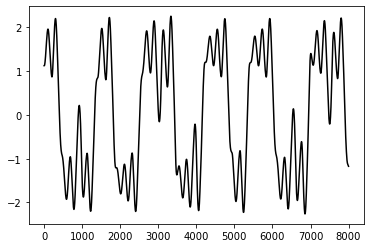

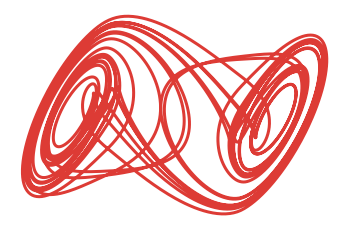

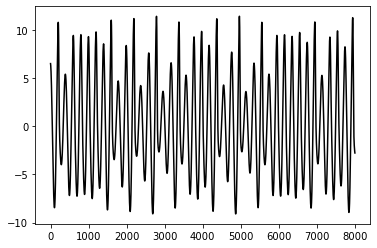

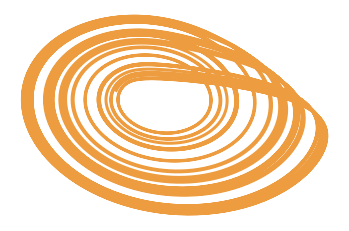

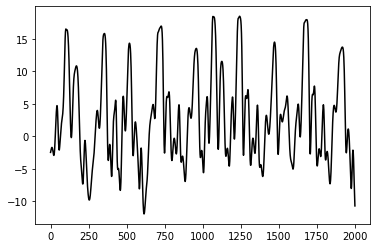

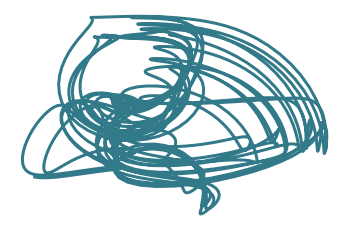

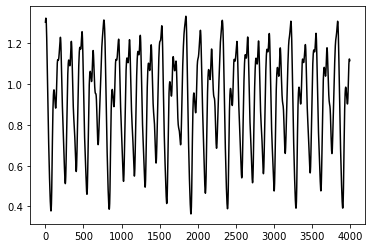

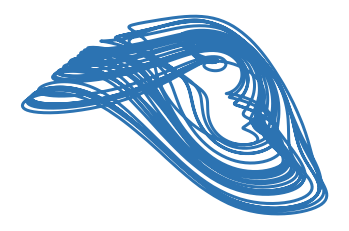

In [168]:
from dysts.flows import *


# eq = Lorenz84()
# eq = SprottA() # relaxation oscillator dynamics / spiking
# eq = ForcedFitzHughNagumo() #  nearly-quasiperiodic
# eq = Lorenz()
# eq = ArnoldBeltramiChildress() # ABC Turbulence


for clr_ind, equation_name in zip([0, 1, 4, 5], ["Chua", "Rossler", "Lorenz96", "MackeyGlass"]):
    
#     equation_name = all_name_clusters[clr_ind][3]
    
    eq = getattr(dysts.flows, equation_name)()
    # eq = HindmarshRose(); clr = dg.pastel_rainbow[0 % 8] # HindmarshRose neuron
    # eq = Colpitts(); clr = dg.pastel_rainbow[3 % 8] #Colpitts LC Circuit
#     eq = CaTwoPlus(); clr = dg.pastel_rainbow[5 % 8] # Quasiperiodic family
    clr = dg.pastel_rainbow[clr_ind]
    sol = eq.make_trajectory(8000, resample=True, pts_per_period=200)
    
    if equation_name == "Lorenz96":
        sol = eq.make_trajectory(2000, resample=True, pts_per_period=200)
        
    if equation_name == "MackeyGlass":
        sol = eq.make_trajectory(4000, resample=True, pts_per_period=200)

    plt.figure()
    plt.plot(sol[:, 0],  'k')

    plt.figure()
    plt.plot(sol[:, 0], sol[:, 1],  color=clr, linewidth=3)
    vanish_axes()
    dg.better_savefig(FIGURE_PATH + f"sample_{equation_name}.png")

## Make histograms of attractor properties

In [8]:
import pandas as pd
import seaborn as sns

from dysts.base import get_attractor_list

attributes =  ['maximum_lyapunov_estimated', 'kaplan_yorke_dimension', 'pesin_entropy', 'correlation_dimension', "multiscale_entropy"]
all_properties = dict()
for equation_name in get_attractor_list():
    eq = getattr(dysts.flows, equation_name)()
    
    
    
    attr_vals = [getattr(eq, item, np.nan) for item in attributes]
    
    all_properties[equation_name] = dict(zip(attributes, attr_vals))
    all_properties[equation_name]["dynamics_dimension"] = int(len(eq.ic))
    all_properties[equation_name]["lyapunov_scaled"] = all_properties[equation_name]["maximum_lyapunov_estimated"] * eq.period
    
all_properties = pd.DataFrame(all_properties).transpose()

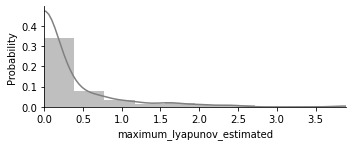

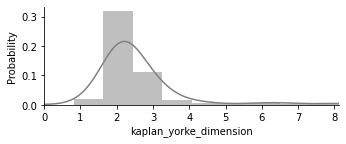

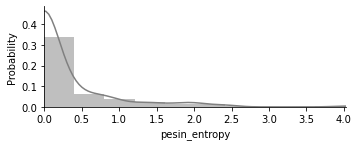

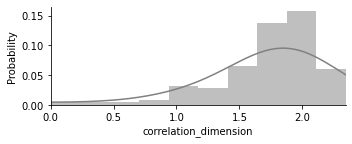

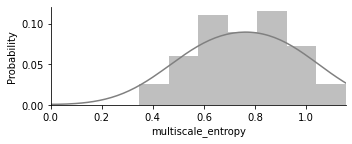

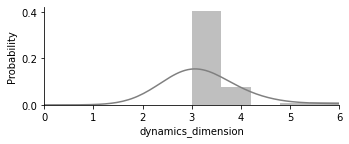

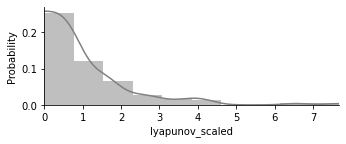

In [79]:
def mirror_df(df, mirror_val=0):
    """
    Create a mirrored augmented dataframe. Used
    for setting the right boundary conditions on kernel 
    density plots
    """
    return pd.concat([df, mirror_val - df])

sns.set_style()
dg.set_style()

for i, key in enumerate(all_properties.columns):
    
    reduced_df = all_properties[np.logical_not(np.isnan(all_properties[key]))]
    reduced_df = reduced_df[reduced_df[key] < np.percentile(reduced_df[key], 95)]
    reduced_df = mirror_df(reduced_df)
#     sns.displot(reduced_df, x=key, 
#                 kind="kde",rug=False,
#                 linewidth=0,
#                 #clip=(0.0, np.nanpercentile(all_properties[key], 99.5)),
#                 #kde=True, cut=0,
#                 bw_method=0.2,
#                 fill=True, color=(0.3, 0.3, 0.3))

    sns.displot(reduced_df, 
                x=key, 
                kde=True,
                stat="probability",
                color=(0.5, 0.5, 0.5),
                linewidth=0,
                bins=20,
                #clip=(0.0, np.nanpercentile(all_properties[key], 99.5)),
                #kde=True, cut=0,
                kde_kws={"bw_method" : 0.2}
               )

#     plt.plot(np.array(reduced_df[key]), np.zeros_like(np.array(reduced_df[key])), '.k')
    plt.xlim([0, np.max(reduced_df[key])])
#     dg.vanish_axes()
    dg.fixed_aspect_ratio(1/3)
    
#     plt.show()

#     if i > 2:
#         break

#     vanish_axes()
    dg.better_savefig(FIGURE_PATH + f"histogram_{key}.png")

In [ ]:
# data_path = dysts.data_path

# with open(data_path, "r") as file:
#     data = json.load(file)
# print(f"Total models being analyzed is {len(data.keys())}.")


# all_lyapunov = list()
# all_correlation_dimensions = list()
# all_kaplan_yorke_dimensions = list()
# all_dynamical_dimensions = list()
# all_pesin_entropies = list()
# all_multiscale_entropies = list()

# for item in data:
#     all_lyapunov.append(data[item]["maximum_lyapunov_estimated"] * data[item]["period"])
#     all_correlation_dimensions.append(data[item]["correlation_dimension"])
#     all_kaplan_yorke_dimensions.append(data[item]["kaplan_yorke_dimension"])
#     all_dynamical_dimensions.append(len(data[item]["initial_conditions"]))
#     all_pesin_entropies.append(data[item]["pesin_entropy"])
#     try:
#         all_multiscale_entropies.append(data[item]["multiscale_entropy"])
#     except:
#         pass

# plt.figure()
# plt.hist(all_correlation_dimensions)
# plt.xlim([0, 3])

# plt.figure()
# # histvals, bins = np.histogram(all_lyapunov)
# # plt.semilogy(3 + bins[:-1], histvals, '.k')
# plt.hist(all_lyapunov, 100)
# plt.xlim([0, 5])


# # plt.figure()
# # plt.hist(all_kaplan_yorke_dimensions)
# # # plt.semilogy(3 + bins[:-1], histvals, '.k')

# # plt.figure()
# # plt.loglog(all_kaplan_yorke_dimensions, all_correlation_dimensions, ".")

# # plt.figure()
# # plt.hist(all_pesin_entropies)

# plt.figure()
# plt.hist(all_multiscale_entropies)